### Load the login data and check it

In [1]:
#import packages
import pandas as pd
import numpy as np 
import json as js
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
#load json files into dataframe df
df = pd.read_json('logins.json')

In [4]:
#check first 5 rows 
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
#check the dimensions of the dataframe
df.shape

(93142, 1)

In [6]:
df.login_time.isna().value_counts()

False    93142
Name: login_time, dtype: int64

In [9]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Based on the above exploration:
- There is only one column/feature in the dataframe: login_time
- 93142 rows, all of which are not null
- Used describe() to check the min and max login dates in the dataframe and can see that date we have range from 1970-01-01 to 1970-04-13

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [11]:
#add a new column 'count' and set it to value 1
#will a use 'count' column for sum when resampling to 15mins
df['count'] = 1
df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


### Resample the data to different timeframes (15 mins, 1 hr, daily, weekly, monthly)

In [167]:
#resample original df to 15 min
df_fifteen = df[['login_time', 'count']].resample('15min', on='login_time').sum()
df_fifteen.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [168]:
#will do a quick check on a couple of date/time to ensure the counts are correct
print('1970-01-01 20:00:00')
print(df[(df['login_time'] >= '1970-01-01 20:00:00') & (df['login_time'] < '1970-01-01 20:15:00')])

print('1970-01-01 20:30:00')
print(df[(df['login_time'] >= '1970-01-01 20:30:00') & (df['login_time'] < '1970-01-01 20:45:00')])

1970-01-01 20:00:00
           login_time  count
0 1970-01-01 20:13:18      1
6 1970-01-01 20:12:16      1
1970-01-01 20:30:00
            login_time  count
7  1970-01-01 20:35:47      1
8  1970-01-01 20:35:38      1
11 1970-01-01 20:31:03      1
12 1970-01-01 20:34:46      1
13 1970-01-01 20:36:34      1
14 1970-01-01 20:39:25      1
15 1970-01-01 20:40:37      1
16 1970-01-01 20:34:58      1
17 1970-01-01 20:43:59      1


The dataframe looks good after resampling and the counts are accurate

In [169]:
#resample original df to houlry (60 mins)
df_hourly = df[['login_time', 'count']].resample('H', on='login_time').sum()
df_hourly.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [170]:
#resample original df to daily
df_daily = df[['login_time', 'count']].resample('D', on='login_time').sum()
df_daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [171]:
#resample original df to weekly
df_weekly =  df[['login_time', 'count']].resample('W', on='login_time').sum()
df_weekly.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


In [172]:
#resample original df to monthly
df_monthly =  df[['login_time', 'count']].resample('M', on='login_time').sum()
df_monthly.head()

,count
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


### Plot the data and check the trend

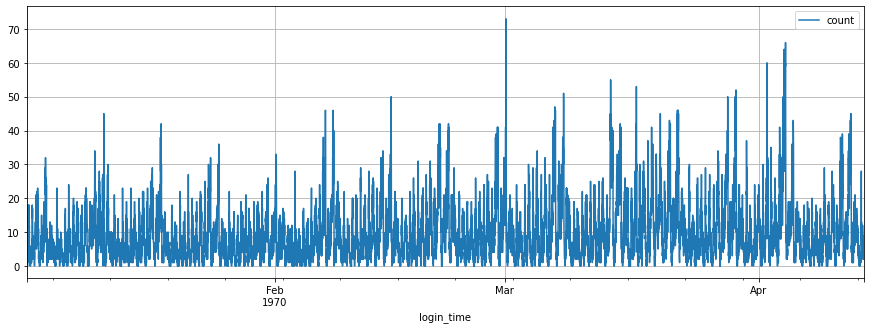

In [173]:
#plot fiften mins dataframe to check the trend
df_fifteen.plot(grid=True, figsize=(15,5))

Based on the fiften minute plot above - I can't see any trend in the data.  It's just going sideways with some spikes in login counts at the begining of March (over 70 logins within 15 mins) and some spikes at the begining to mid april.

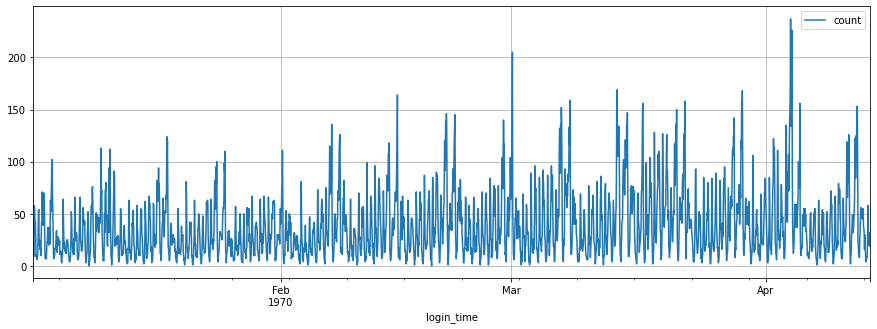

In [174]:
df_hourly.plot(grid=True, figsize=(15,5))

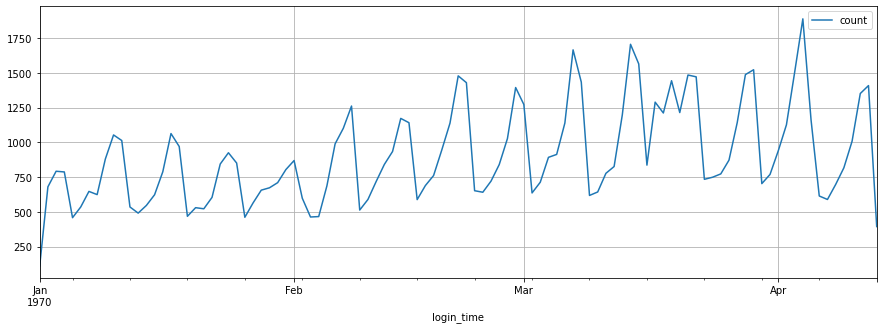

In [175]:
df_daily.plot(grid=True, figsize=(15,5))

The hourly plot also doesn't show much of trend - but on the daily plot we can see very small uptrend.

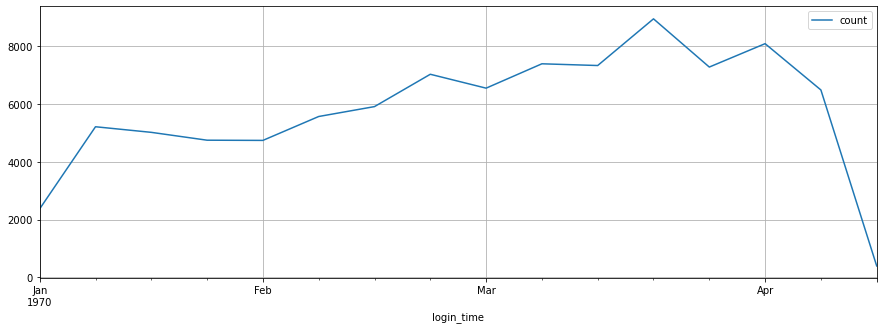

In [176]:
df_weekly.plot(grid=True, figsize=(15,5))

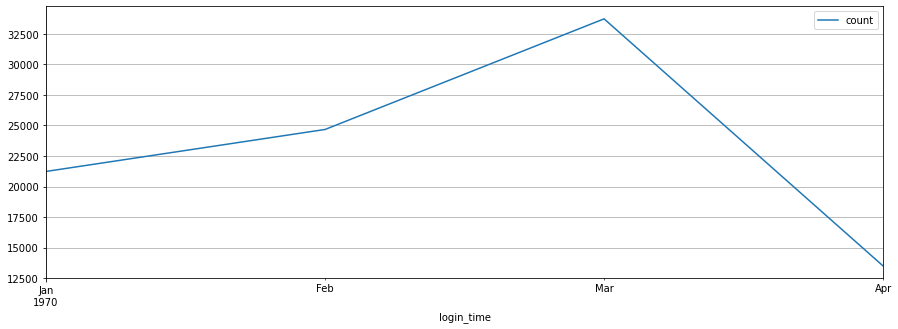

In [177]:
df_monthly.plot(grid=True, figsize=(15,5))

The weekly and monthly plots above show an uptrend up until Begining of march and a huge downtrend during the month of March going into april. but this is porbably due to the fact that we only have data for 13 days in April. 

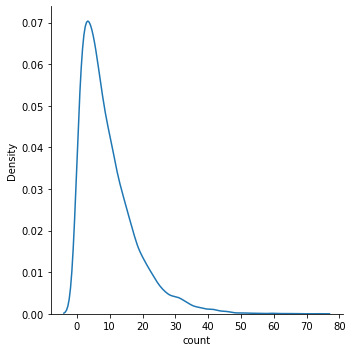

In [178]:
sns.displot(df_fifteen, x='count', kind = 'kde')

We can see from the kde plot above that for the 15-min resampled dataframes the highest count of logins is approximatly 10 - meaning the 10 logins is the most occuring number of logins in our sample. 

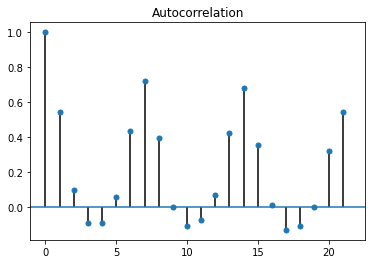

In [109]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_array = acf(df_daily)

plot_acf(df_daily, alpha=1)
plt.show()

<BarContainer object of 4 artists>

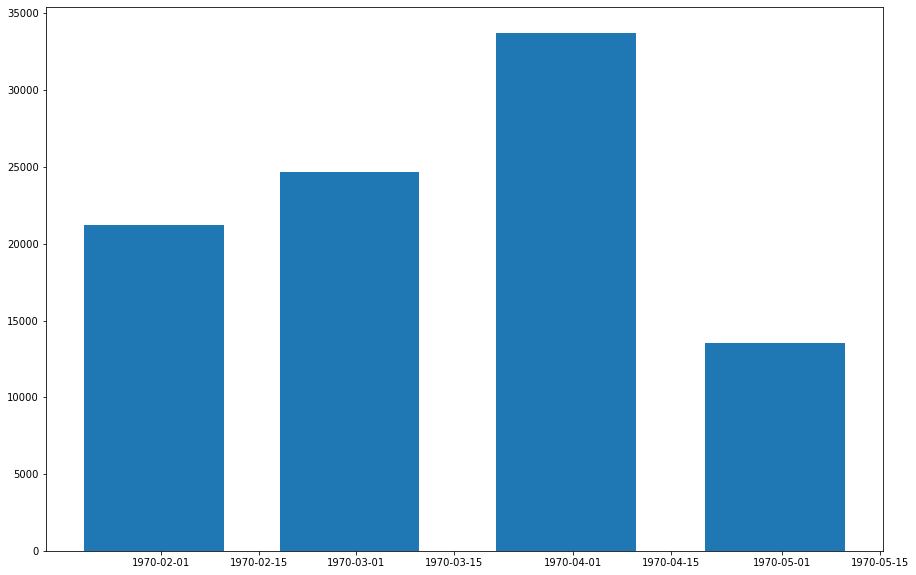

In [186]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(df_monthly.index, df_month['count'], width=20, align='center')

<BarContainer object of 9788 artists>

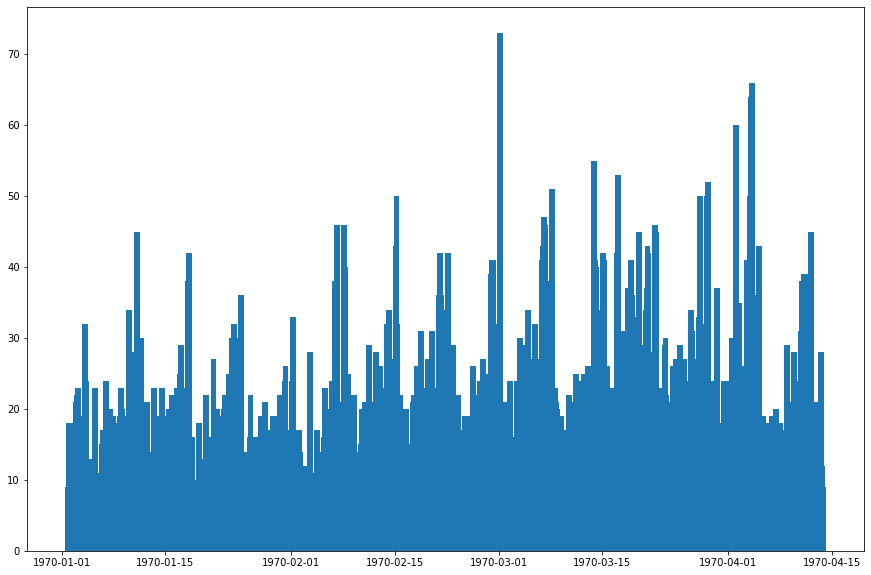

In [187]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(df_fifteen.index, df_resample['count'], align='center')

<BarContainer object of 103 artists>

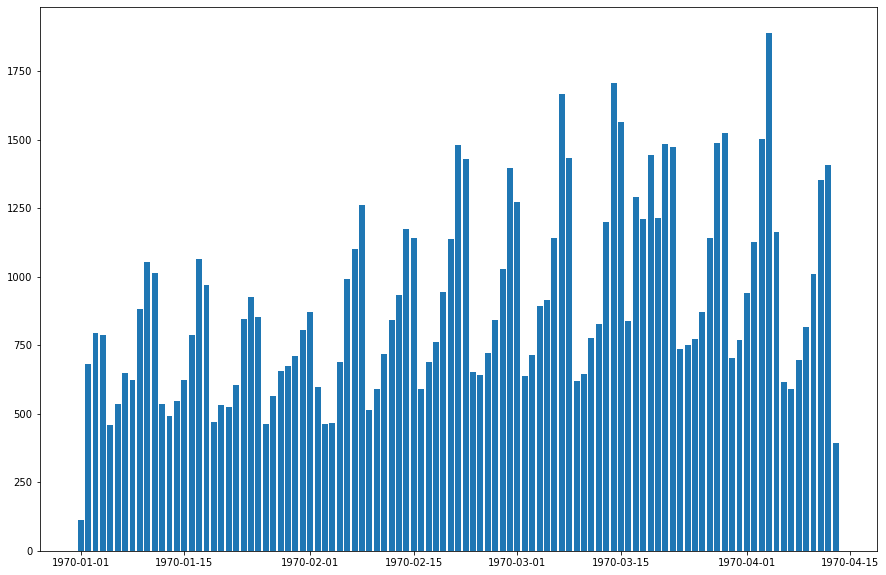

In [183]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(df_daily.index, df_daily['count'], align='center')

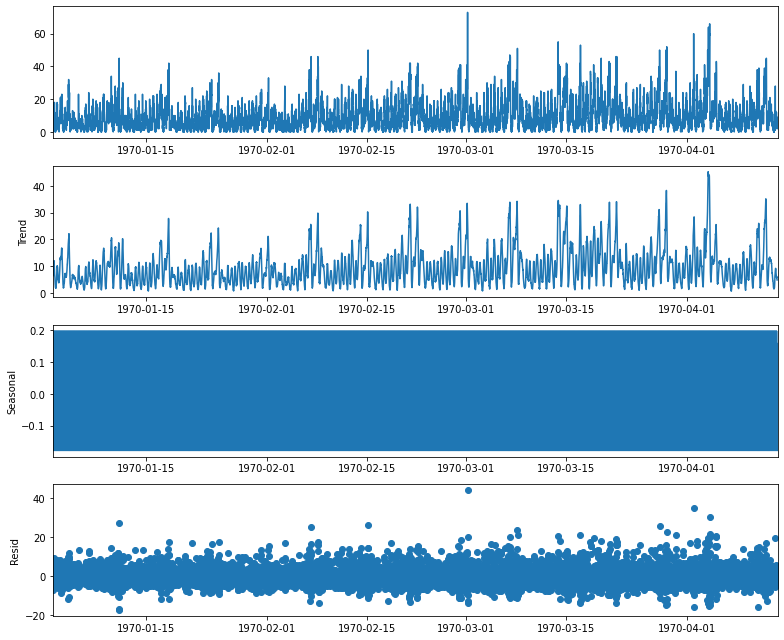

In [190]:
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_fifteen, model='Additive', freq=15)
fig= decomposition.plot()
plt.show()

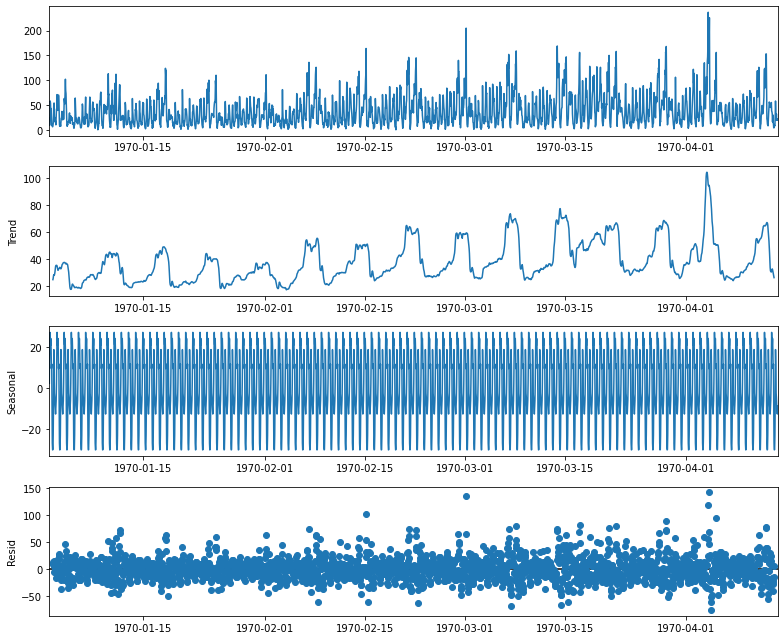

In [191]:
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_hourly, model='Additive')
fig= decomposition.plot()
plt.show()

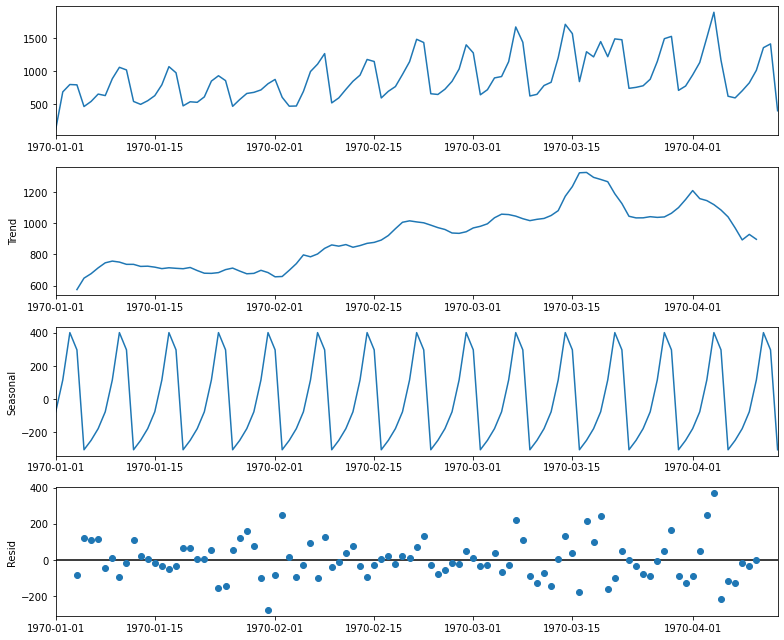

In [192]:
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_daily, model='Additive')
fig= decomposition.plot()
plt.show()